In [117]:
from google.cloud import bigquery
import pandas as pd

## Initialize a client
BigQuery APIとやりとりするクライアントを初期化する


### Client project
`bigquery.Client` object のプロジェクトを指定する。（指定しない場合はデフォルトプロジェクト）


### Client location
BigQuery のジョブ、データセット、テーブルの初期設定を与える。


In [2]:
client = bigquery.Client(location="US")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: ml-session


In [118]:
client = bigquery.Client(location="US", project="ml-session")

# Example: Send a query to a Public dataset

In [8]:
query = """
SELECT
  vendor_id,
  passenger_count,
  trip_distance,
  rate_code,
  payment_type,
  total_amount,
  tip_amount
FROM
  `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2018`
WHERE tip_amount >= 0
LIMIT 100
"""
query_job = client.query(
    query,
     location="US",
)

df = query_job.to_dataframe()
df.head(5)

,vendor_id,passenger_count,trip_distance,rate_code,payment_type,total_amount,tip_amount
0,2,1,9.420000000,1,1,38.500000000,7.700000000
1,1,1,19.000000000,1,1,66.800000000,10.000000000
2,1,2,10.300000000,1,1,41.300000000,10.000000000
3,2,3,8.330000000,1,1,31.560000000,5.260000000
4,2,1,8.230000000,1,1,34.560000000,5.760000000
...,...,...,...,...,...,...,...
95,1,1,9.400000000,1,1,47.460000000,7.900000000
96,1,1,12.700000000,1,1,53.970000000,4.910000000
97,1,2,6.100000000,1,1,35.750000000,5.950000000
98,1,1,7.500000000,1,1,30.000000000,5.200000000


In [10]:
df.passenger_count.describe()

count    100.000000
mean       1.630000
std        1.177697
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: passenger_count, dtype: float64

In [12]:
df.astype({'total_amount': float}).total_amount.describe()

count    100.000000
mean      43.956700
std       17.249082
min        4.180000
25%       32.860000
50%       42.445000
75%       52.262500
max      112.410000
Name: total_amount, dtype: float64

In [11]:
#@BigQuery
SELECT name, SUM(number) as total
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    GROUP BY name
    ORDER BY total DESC
    LIMIT 10

# TMDB 5000 Movie Dataset
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

In [ ]:
# https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system
# https://www.kaggle.com/code/rafffael/geting-started-movie-recommendation-with-eda-demo

# Load data from Cloud Strage

In [1]:
from google.cloud import storage
client = storage.Client(project=' ml-session')

In [2]:
import pandas as pd 
import numpy as np
# Get the uri from the left pane
df_credits=pd.read_csv('gs://ml_session9/TMDB/tmdb_5000_credits.csv')
df_movies=pd.read_csv("gs://ml_session9/TMDB/tmdb_5000_movies.csv")

In [3]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


The first dataset contains the following features:-

- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

The second dataset has the following features:-
- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.
Let's join the two dataset on the 'id' column

In [5]:
df_credits.columns = ['id','title2','cast','crew']

In [6]:
df_movies= df_movies.merge(df_credits,on='id')

In [7]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [7]:
!pip install ipywidgets --user

In [8]:
from pandas_profiling import ProfileReport

In [ ]:
report = ProfileReport(df_movies)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
# convert date appropriate format
df_movies["release_date"] = pd.to_datetime(df_movies['release_date'])
df_movies['release_year'] = df_movies['release_date'].dt.year
df_movies['release_month'] = df_movies['release_date'].dt.month_name()
del df_movies["release_date"]

In [10]:
import json
# transform all columns which had json string into json format
# several columns has id and name
# leave only name for them beacause id is not so important in this case
json_columns = {'cast', 'crew', 'genres', 'keywords', 'production_countries', 
                'production_companies', 'spoken_languages'}

for c in json_columns:
    df_movies[c] = df_movies[c].apply(json.loads)
    if c != "crew": # We need other information besides the name
        df_movies[c] = df_movies[c].apply(lambda row: [x["name"] for x in row])

In [12]:
pd.set_option("display.max_columns", None)

In [18]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,director,writer,producer,profit
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,James Cameron,James Cameron,2550965087


In [16]:
from functools import partial

In [17]:
# create director writer and producer columns 
def get_job(job, row):
    person_name = [x['name'] for x in row if x['job']==job] 
    return person_name[0] if len(person_name) else np.nan

df_movies["director"] = df_movies["crew"].apply(partial(get_job, "Director"))
df_movies["writer"]   = df_movies["crew"].apply(partial(get_job, "Writer"))
df_movies["producer"] = df_movies["crew"].apply(partial(get_job, "Producer"))
del df_movies["crew"]

# create profit column
df_movies["profit"] = df_movies["revenue"] - df_movies["budget"]

In [22]:
# fill some missing values by most frequent one
for col in ["runtime", "release_year", "release_month"]:
    df_movies[col] = df_movies[col].fillna(df_movies[col].mode().iloc[0])

In [91]:
df_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,director,writer,producer,profit,release_year,release_month
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,James Cameron,James Cameron,2550965087,2009.0,December


In [110]:
df_movies.head(1).keywords.sum()[:5]

['culture clash', 'future', 'space war', 'space colony', 'society']

In [ ]:

# import numpy as np
# import os
# import pickle
# from pywaffle import Waffle

# import scipy
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


# pd.set_option("display.max_columns", None)


In [27]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

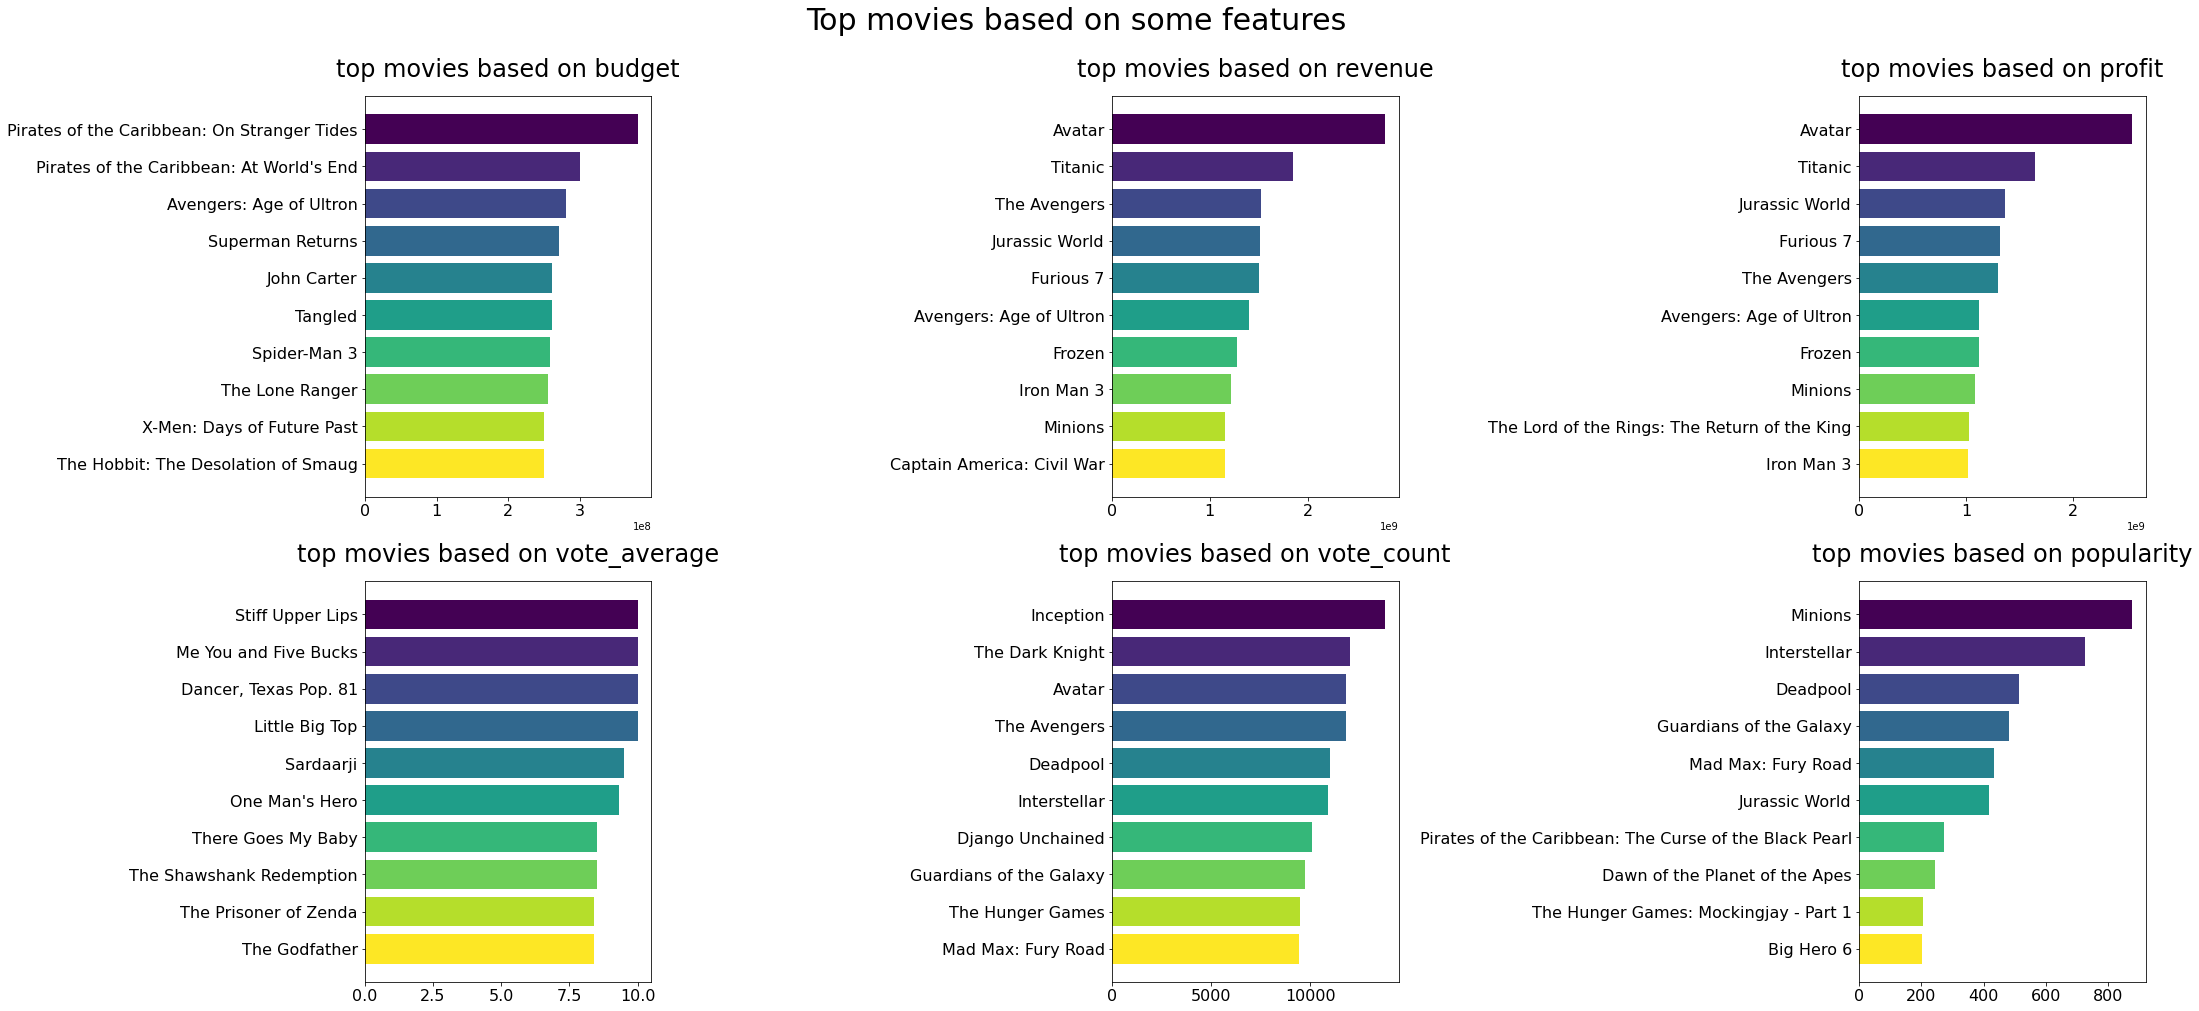

In [29]:
top_movie_num = 10
top_movies_based_on = ["budget", "revenue", "profit", "vote_average", "vote_count", "popularity"]

fig, ax = plt.subplots(len(top_movies_based_on)//3, 3, figsize=(30,14))
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i, col in enumerate(top_movies_based_on):
    top_movies_by = df_movies.sort_values(by=[col], ascending=False).head(top_movie_num)
    r, c = i//3, i%3
    ax[r][c].barh(top_movies_by["title"], top_movies_by[col], color=colors.colors)
    ax[r][c].set_title(f"top movies based on {col}", fontsize=24, pad=20)
    ax[r][c].tick_params(axis='both', which='major', labelsize=16)
    ax[r][c].invert_yaxis()    
    
plt.suptitle('Top movies based on some features',fontsize=30, y=1)
fig.tight_layout()

In [36]:
!pip install squarify --user

In [37]:
from collections import defaultdict, Counter
import squarify

In [111]:
df_movies["keywords"][0][:5]

['culture clash', 'future', 'space war', 'space colony', 'society']

In [53]:
df_movies["genres"][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [73]:
df_movies["original_language"][0]

'en'

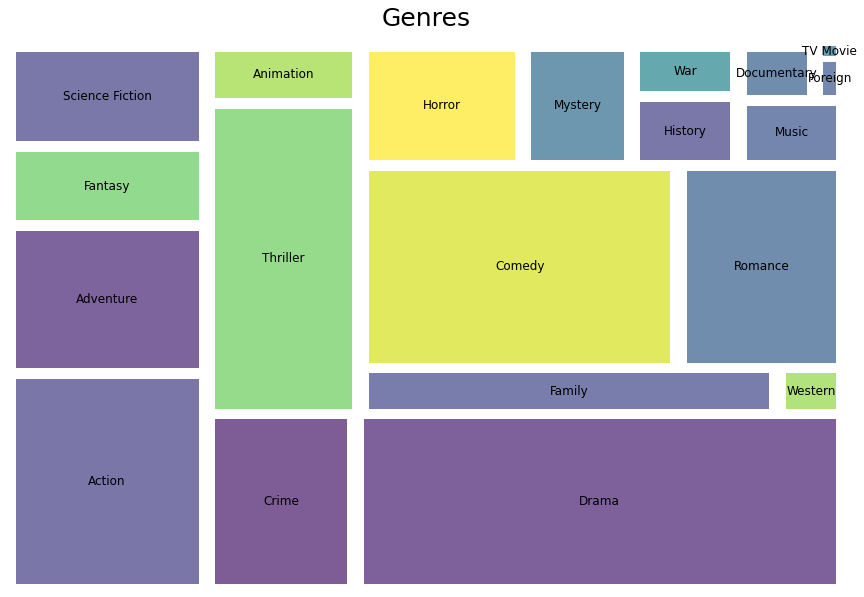

In [38]:
# plot genre frequncy with treemap 
genres_flatten = sum(df_movies["genres"].values, []) # genres are list of lists
genres_info = Counter(genres_flatten)

plt.figure(figsize=(15, 10))
plt.title("Genres", fontsize=25, pad=20)
squarify.plot(genres_info.values(), label=genres_info.keys(), text_kwargs={'fontsize':12}, bar_kwargs={'alpha':.7}, pad=True)
plt.axis("off");

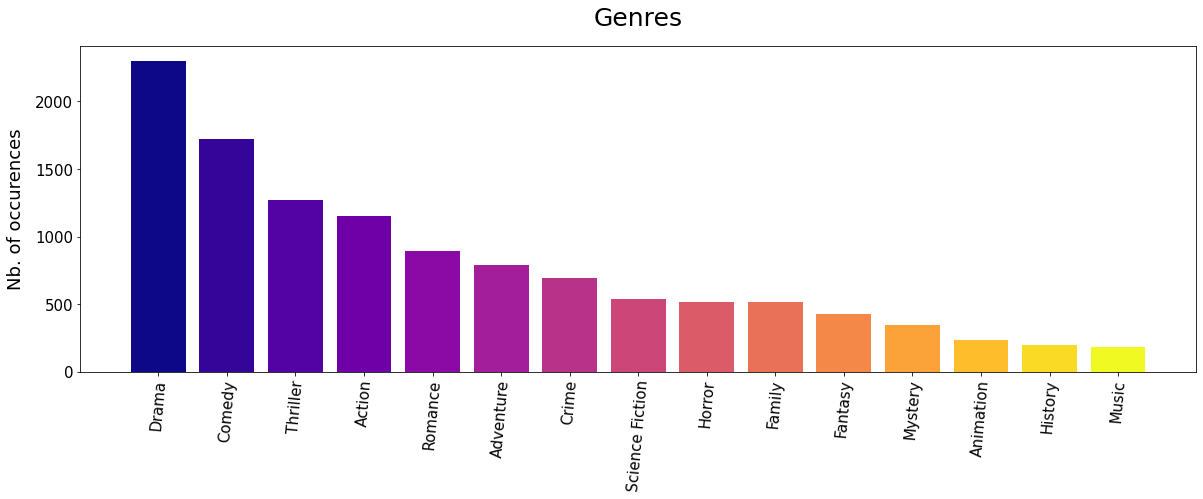

In [69]:
top_genres_num = 15
genres_flatten = sum(df_movies["genres"].values, []) # genres are list of lists
genres_info = Counter(genres_flatten)
top_genres = dict(genres_info.most_common(top_genres_num))

plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)
plt.bar(top_genres.keys(), top_genres.values(), align='center', color=plt.cm.get_cmap('plasma', top_genres_num).colors)
# plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)
plt.title("Genres", fontsize=25, pad=20)
plt.show()

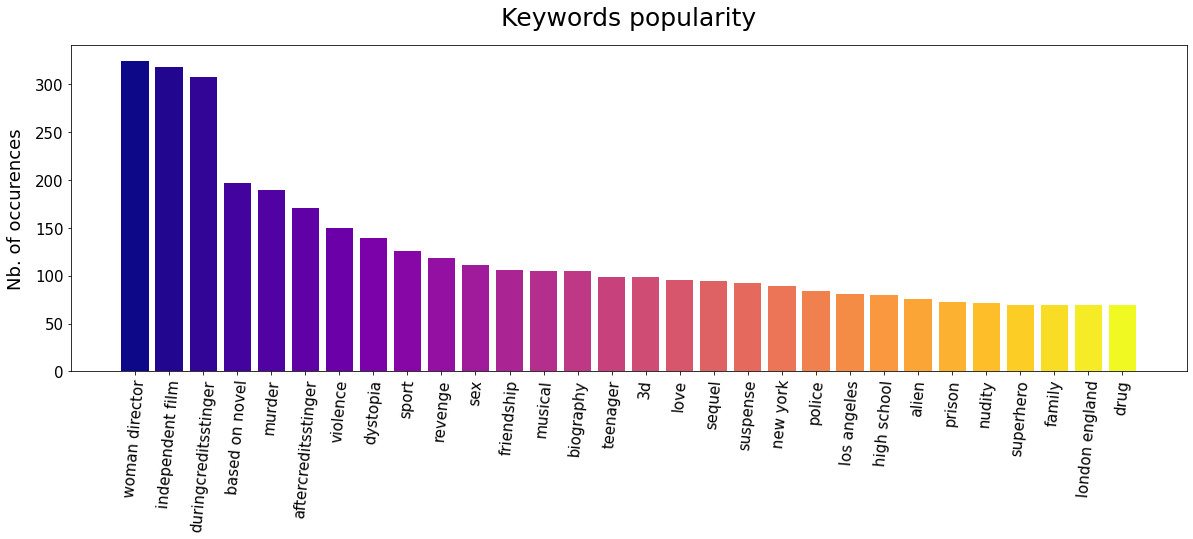

In [61]:
top_keywords_num = 30
keywords_flatten = sum(df_movies["keywords"].values, []) # keywords are list of lists
keywords_info = Counter(keywords_flatten)
top_keywords = dict(keywords_info.most_common(top_keywords_num))

plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)
plt.bar(top_keywords.keys(), top_keywords.values(), align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)
plt.title("Keywords popularity", fontsize=25, pad=20)
plt.show()

In [87]:
df_movies["original_language"].value_counts()[:5]

en    4505
fr      70
es      32
zh      27
de      27
Name: original_language, dtype: int64

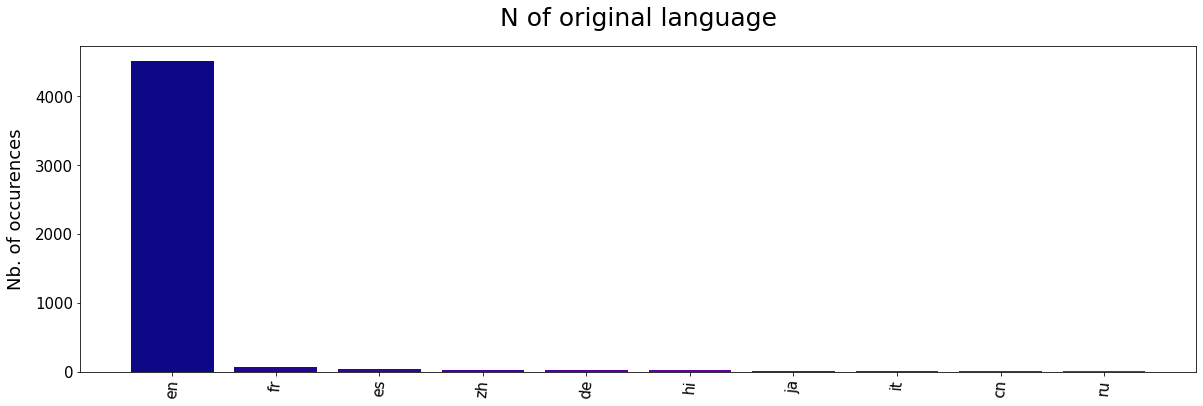

In [83]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=85, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18, labelpad=10)

plt.bar(df_movies["original_language"].value_counts()[:10].index,
        df_movies["original_language"].value_counts()[:10].values,
        align='center', color=plt.cm.get_cmap('plasma', top_keywords_num).colors)

plt.title("N of original language", fontsize=25, pad=20)
plt.show()

In [90]:
df_movies["production_countries"].values

array([list(['United States of America', 'United Kingdom']),
       list(['United States of America']),
       list(['United Kingdom', 'United States of America']), ...,
       list(['United States of America']),
       list(['United States of America', 'China']),
       list(['United States of America'])], dtype=object)

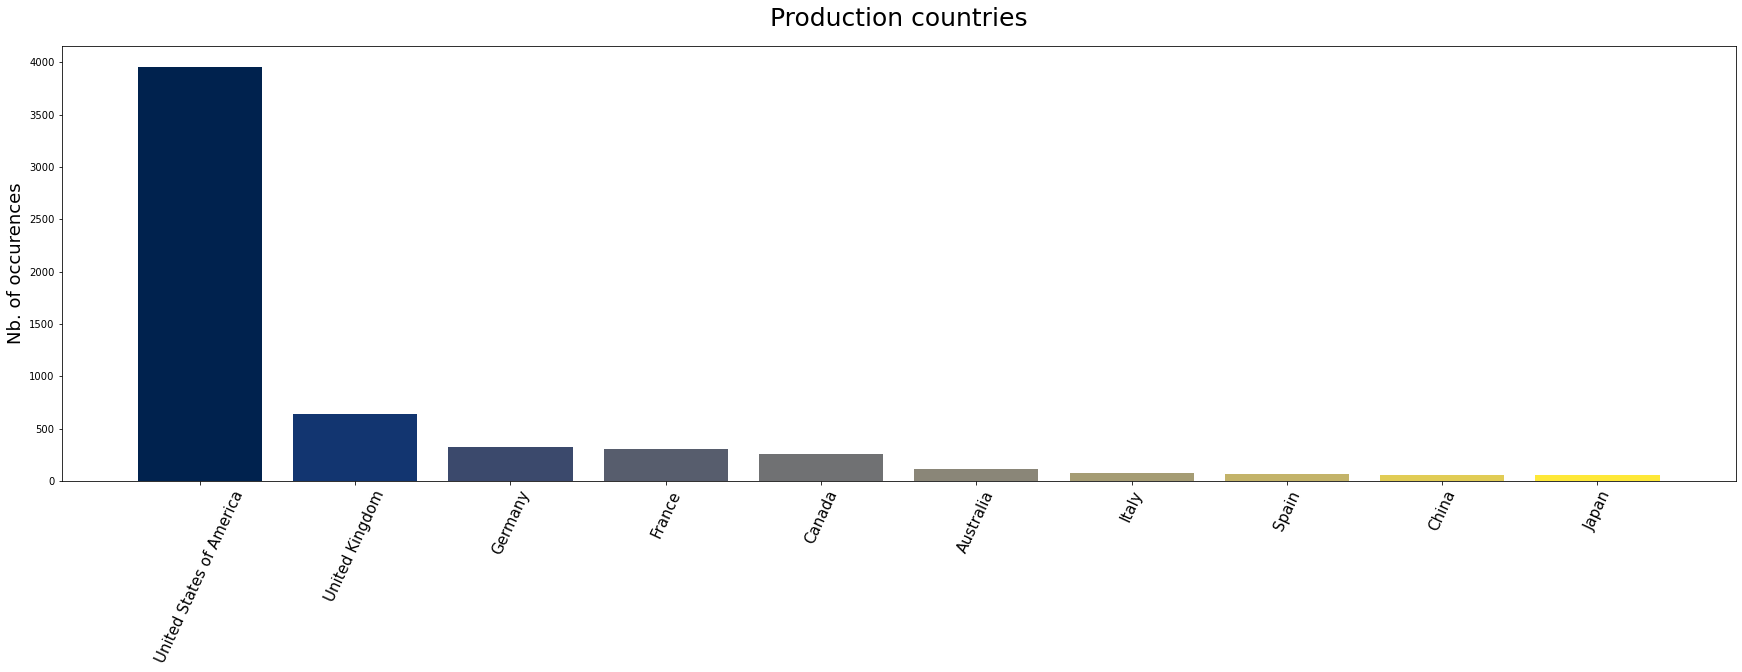

In [85]:
top_contries_num = 10
production_contries_flatten = sum(df_movies["production_countries"].values, []) # production_countries are list of lists
production_contries_info = Counter(production_contries_flatten)
top_production_contries = production_contries_info.most_common(top_contries_num)

plt.figure(figsize=(30, 8))
plt.xticks(rotation=65, fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18)
plt.title("Production countries", fontsize=25, pad=20)
plt.bar(dict(top_production_contries).keys(),
        dict(top_production_contries).values(),
        color=plt.cm.get_cmap('cividis', top_contries_num).colors);

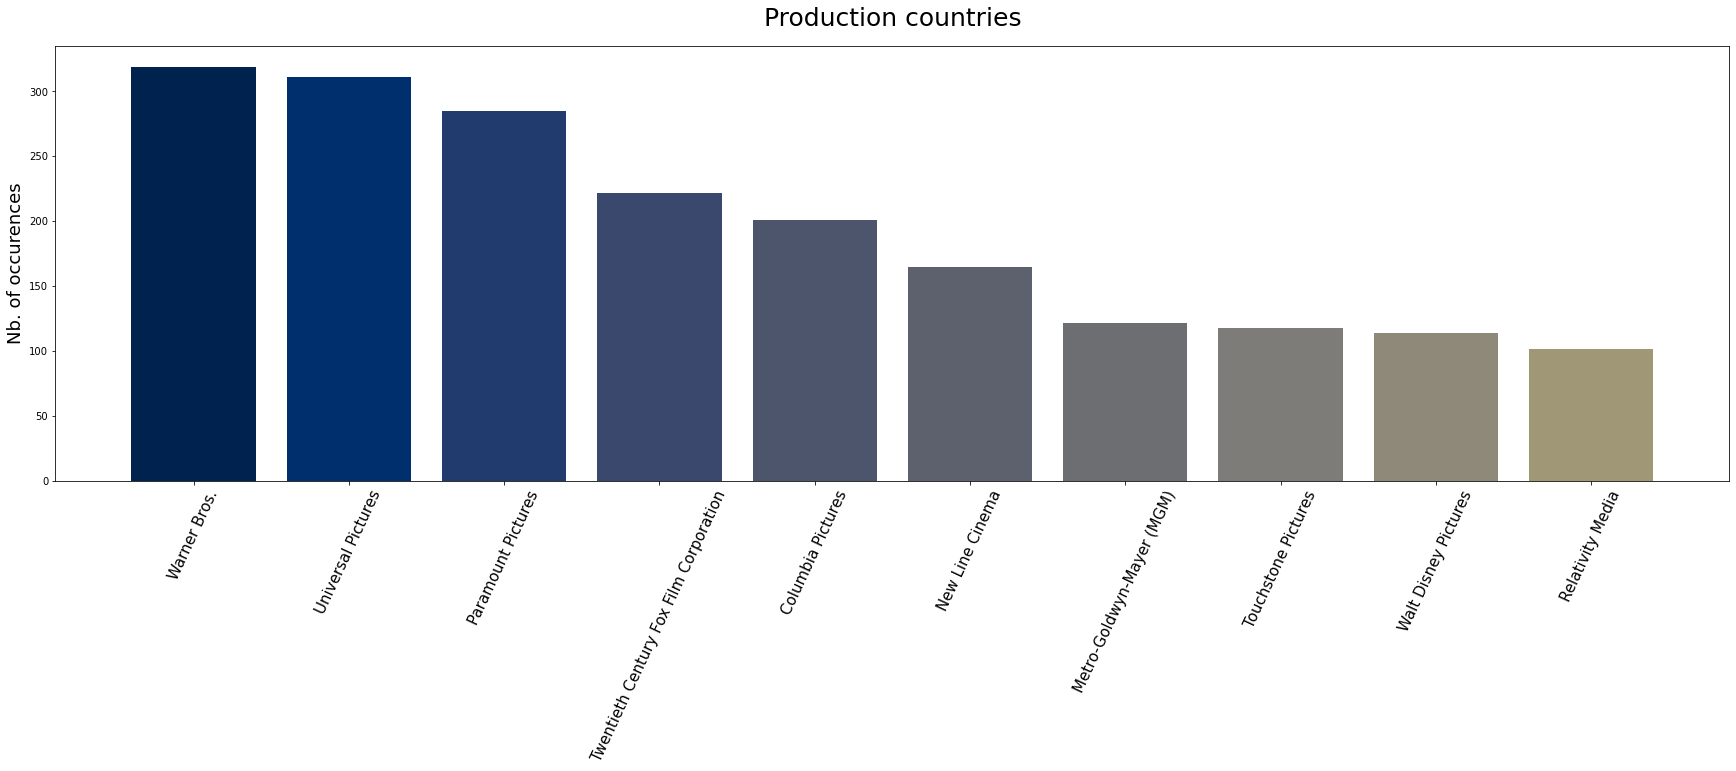

In [97]:
top_companies_num = 15
production_companies_flatten = sum(df_movies["production_companies"].values, []) # production_companies are list of lists
production_companies_info = Counter(production_companies_flatten)
top_production_companies = production_companies_info.most_common(10)


plt.figure(figsize=(30, 8))
plt.xticks(rotation=65, fontsize=15)
plt.ylabel("Nb. of occurences", fontsize=18)
plt.title("Production countries", fontsize=25, pad=20)
plt.bar(dict(top_production_companies).keys(),
        dict(top_production_companies).values(),
        color=plt.cm.get_cmap('cividis', top_companies_num).colors);

# fig = plt.figure(
#     FigureClass=Waffle, 
#     rows=30, 
#     values=dict(top_production_companies), 
#     legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
#     icons='child', icon_size=14, 
#     icon_legend=True,
#     figsize=(24,8)
# )

In [93]:
!pip install wordcloud --user
from wordcloud import WordCloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.1/366.1 KB 7.5 MB/s eta 0:00:0000:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [104]:
df_movies["cast"].values[0][:5]

['Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez']

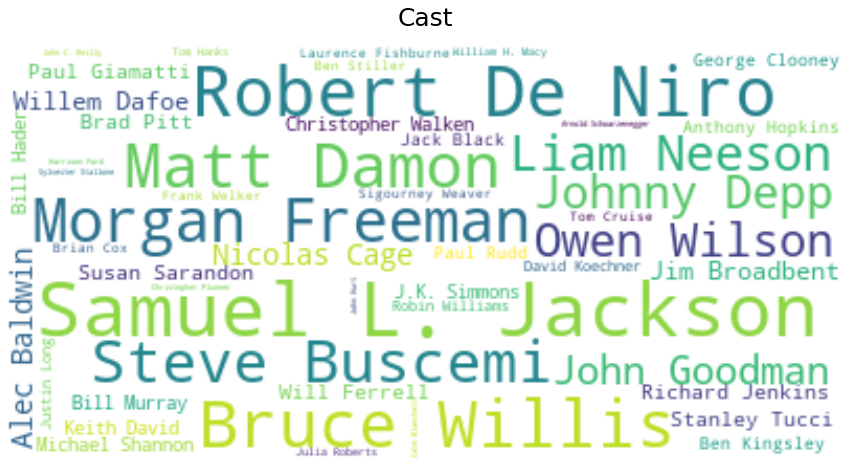

In [105]:
# plot unique cast frequency
cast_flatten = sum(df_movies["cast"].values, []) # cast are list of lists
cast_info = Counter(cast_flatten)

wordcloud = WordCloud(background_color='white')
wordcloud.generate_from_frequencies(dict(cast_info.most_common(50)))

plt.figure(figsize=(15,10))
plt.title("Cast", fontsize=25, pad=20)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off");

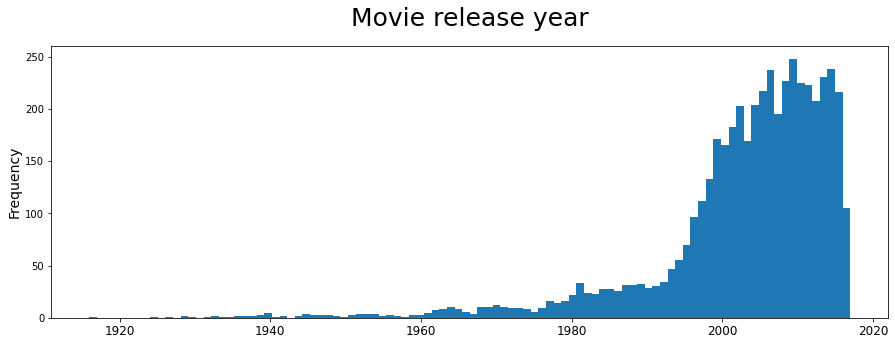

In [107]:

plt.xticks(fontsize=12)
plt.ylabel("Nb. of occurences", fontsize=14)
plt.title("Movie release year", fontsize=25, pad=20)
df_movies["release_year"].plot.hist(figsize=(15,5), bins=100);

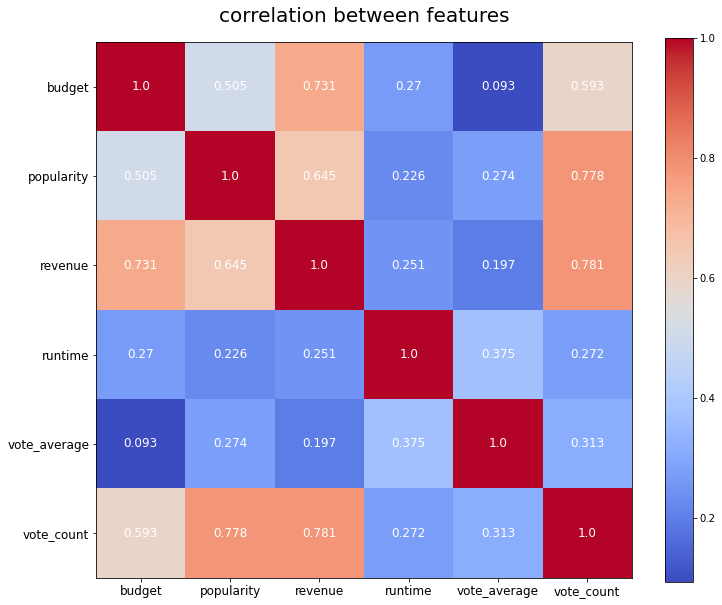

In [109]:
matrix = df_movies[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]].corr()

f, ax = plt.subplots(figsize=(12, 10))
plt.title("correlation between features", fontsize=20, pad=20)
plt.xticks(range(len(matrix.index)), matrix.index, fontsize=12)
plt.yticks(range(len(matrix.index)), matrix.index, fontsize=12)

# adding values
for i in range(len(matrix.index)):
    for j in range(len(matrix.index)):
        text = ax.text(j, i, round(matrix.iloc[i, j],3), ha="center", va="center", color="w", fontsize=12)
        
plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar();

In [112]:
bq_table = df_movies[["budget", "popularity", "revenue", "runtime", "vote_average", "vote_count"]]

In [114]:
bq_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        4803 non-null   int64  
 1   popularity    4803 non-null   float64
 2   revenue       4803 non-null   int64  
 3   runtime       4803 non-null   float64
 4   vote_average  4803 non-null   float64
 5   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 391.7 KB


# Load the dataframe to BigQuery

In [127]:
bq_table.head(1)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,237000000,150.437577,2787965087,162.0,7.2,11800


In [129]:
# Define a name for the new dataset.
dataset_id = 'session9'

# The project defaults to the Client's project if not specified.
dataset = client.create_dataset(dataset_id)  # API request

In [130]:
dataset

Dataset(DatasetReference('ml-session', 'session9'))

In [131]:
# Optionally set explicit indices.
# If indices are not specified, a column will be created for the default
# indices created by pandas.
# df = pandas.DataFrame(records, index=pandas.Index(index, name="wikidata_id"))

table_ref = dataset.table("movie_database2")
job = client.load_table_from_dataframe(bq_table, table_ref, location="US")

job.result()  # Waits for table load to complete.
print("Loaded dataframe to {}".format(table_ref.path))

Loaded dataframe to /projects/ml-session/datasets/session9/tables/movie_database2


In [134]:
query = """
SELECT
  *
FROM
  `ml-session.session9.movie_database2`
WHERE budget > 0
LIMIT 100
"""
query_job = client.query(
    query,
     location="US",
)

df = query_job.to_dataframe()
df.head(5)

,budget,popularity,revenue,runtime,vote_average,vote_count
0,5000000,0.999655,0,67.0,3.0,3
1,50000,0.595809,0,75.0,3.5,2
2,25000000,14.613152,8784318,137.0,5.5,301
3,23000000,6.618149,16123851,141.0,5.5,73
4,10000000,1.374409,0,74.0,5.5,2


In [150]:
# revenue を予測
ml_query = """
CREATE OR REPLACE MODEL `session9.movie_revenue_pred`
OPTIONS (model_type='boosted_tree_regressor',
         input_label_cols=['revenue'],
         max_iterations = 10,
         tree_method = 'HIST',
         subsample = 0.85,
         enable_global_explain = TRUE
) AS
SELECT
  *
FROM
  `ml-session.session9.movie_database2`
WHERE budget > 0
LIMIT 10000
"""
query_job = client.query(
    query,
     location="US",
)
df = query_job.to_dataframe()

In [151]:
df

,budget,popularity,revenue,runtime,vote_average,vote_count
0,5000000,0.999655,0,67.0,3.0,3
1,50000,0.595809,0,75.0,3.5,2
2,25000000,14.613152,8784318,137.0,5.5,301
3,23000000,6.618149,16123851,141.0,5.5,73
4,10000000,1.374409,0,74.0,5.5,2
...,...,...,...,...,...,...
95,50000000,28.725621,44547681,140.0,6.8,582
96,40000000,49.664128,251171807,138.0,6.8,2807
97,36000000,3.698276,74000000,155.0,6.8,316
98,30000000,19.143721,14460000,63.0,6.8,258


In [147]:
query_job

QueryJob<project=ml-session, location=US, id=c99bba81-8915-429c-a3ca-779914a03075>

In [152]:
training_info = """
SELECT
  training_run,
  iteration,
  loss,
  eval_loss,
  duration_ms,
  learning_rate
FROM
  ML.TRAINING_INFO(MODEL `session9.movie_revenue_pred`)
ORDER BY iteration ASC
"""
client.query(training_info).to_dataframe()

NotFound: 404 Not found: Model ml-session:session9.movie_revenue_pred

Location: US
Job ID: facd9682-afd6-42cd-919d-5af98b7fc330


In [128]:
# Delete the dataset and its contents
client.delete_dataset(dataset, delete_contents=True)

print('Deleted dataset: {}'.format(dataset.path))

Deleted dataset: /projects/ml-session/datasets/session9
